# Tidy Tuesday Week 1

For this first Tidy Tuesdays activity, the dataset chosen was that on suicide rates taken from https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016 .

In [454]:
# Data analysis and data preparation
import pandas as pd
import numpy as np
import random as rnd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation

### Examining of data

The dataset was examined to get a better idea of its contents.

In [266]:
master_df = pd.read_csv('master.csv')

master_df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [267]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [40]:
master_df.shape

(27820, 12)

In [46]:
master_df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [403]:
master_df[' gdp_for_year ($) '].unique()

array(['2,156,624,900', '2,126,000,000', '2,335,124,988', ...,
       '51,821,573,338', '57,690,453,461', '63,067,077,179'], dtype=object)

In [82]:
master_df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [349]:
master_df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

### Removing null and redundant values 

The dataframe is checked for any missing data:

In [39]:
master_df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

The column containing data for HDI has 19456 missing values. Given that the number of missing values accounts for more than 50% of the total number of entries in the dataframe, the 'HDI for year' column will be dropped.

In [425]:
new_master_df = master_df.drop(['HDI for year'], axis=1)

new_master_df.shape

(27820, 11)

In [426]:
new_master_df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


At the same time, it can be seen that the data under the column of 'country-year' are redundant as there are already data on the country and year in their own respective columns, so the data of column 'country-year' will also be dropped.

In [427]:
new_master_df = new_master_df.drop(['country-year'], axis=1)
new_master_df.shape

(27820, 10)

In [428]:
new_master_df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


### Renaming Columns

Next, the remaining columns will be renamed so they would have a consistent format.

In [431]:
new_master_df = new_master_df.rename(columns={'suicides/100k pop':'suicides_per_100k_pop', ' gdp_for_year ($) ':'gdp_for_year_dollars', 
                                              'gdp_per_capita ($)':'gdp_per_capita_dollars'})

In [432]:
new_master_df.head(5)
#new_master_df['gdp_for_year_($)'].unique()

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,gdp_for_year_dollars,gdp_per_capita_dollars,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


### Reformatting Data


In [433]:
new_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 27820 non-null  object 
 1   year                    27820 non-null  int64  
 2   sex                     27820 non-null  object 
 3   age                     27820 non-null  object 
 4   suicides_no             27820 non-null  int64  
 5   population              27820 non-null  int64  
 6   suicides_per_100k_pop   27820 non-null  float64
 7   gdp_for_year_dollars    27820 non-null  object 
 8   gdp_per_capita_dollars  27820 non-null  int64  
 9   generation              27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [434]:
new_master_df.head(10)

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,gdp_for_year_dollars,gdp_per_capita_dollars,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,"2,156,624,900",796,Generation X


The data type used for the data under the column of 'gdp_for_year_($)' is an object or string, even when the data is supposedly numerical in nature. The data type of the column is therefore changed to int64 by replacing the commas and converting the data.

In [435]:
new_master_df['gdp_for_year_dollars'] = new_master_df['gdp_for_year_dollars'].str.replace(",","").astype(np.int64)

new_master_df.head(10)

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,gdp_for_year_dollars,gdp_per_capita_dollars,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,2156624900,796,Generation X


Additionally, since the data type of age is object, the age of "5-14 years" will not appear as the first entry when grouped, so this will be replaced with "05-14 years".

In [436]:
new_master_df['age'] = new_master_df['age'].str.replace("5-14 years","05-14 years")

new_master_df.head(10)

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,gdp_for_year_dollars,gdp_per_capita_dollars,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,2156624900,796,G.I. Generation
9,Albania,1987,female,05-14 years,0,311000,0.00,2156624900,796,Generation X


In [437]:
new_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 27820 non-null  object 
 1   year                    27820 non-null  int64  
 2   sex                     27820 non-null  object 
 3   age                     27820 non-null  object 
 4   suicides_no             27820 non-null  int64  
 5   population              27820 non-null  int64  
 6   suicides_per_100k_pop   27820 non-null  float64
 7   gdp_for_year_dollars    27820 non-null  int64  
 8   gdp_per_capita_dollars  27820 non-null  int64  
 9   generation              27820 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.1+ MB


In [439]:
new_master_df['gdp_for_year_dollars'].nunique()

2321

In [440]:
new_master_df.nunique()

country                     101
year                         32
sex                           2
age                           6
suicides_no                2084
population                25564
suicides_per_100k_pop      5298
gdp_for_year_dollars       2321
gdp_per_capita_dollars     2233
generation                    6
dtype: int64

### Duplicate Data

A test dataframe was created where any duplicate rows from the currently trimmed new_master_df dataframe were dropped.

In [441]:
test = new_master_df.drop_duplicates()
test.shape

(27820, 10)

The number of rows remained the same, so there are no duplicate rows of data.

## Data Analysis

###  Statistical Overview

In [479]:
plt.style.use('seaborn-darkgrid')

In [480]:
new_master_df.describe()

,year,suicides_no,population,suicides_per_100k_pop,gdp_for_year_dollars,gdp_per_capita_dollars
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


### Total Suicide Rates from 1985-2016

Below is a rundown of the total suicide rates per year from 1985-2016, together with a line graph that illustrates their trend over time.

In [558]:
new_master_df.groupby(['year']).suicides_per_100k_pop.sum()

year
1985     6811.89
1986     6579.84
1987     7545.45
1988     7473.13
1989     8036.54
1990     9878.75
1991    10321.06
1992    10528.88
1993    10790.29
1994    11483.79
1995    14660.26
1996    14142.21
1997    13817.83
1998    14150.72
1999    14473.91
2000    14387.45
2001    14276.21
2002    14227.72
2003    13627.58
2004    12581.80
2005    12164.99
2006    12166.01
2007    12410.15
2008    12145.84
2009    12176.04
2010    11843.99
2011    11367.84
2012    11101.91
2013    10663.64
2014    10306.73
2015     8253.99
2016     2147.39
Name: suicides_per_100k_pop, dtype: float64

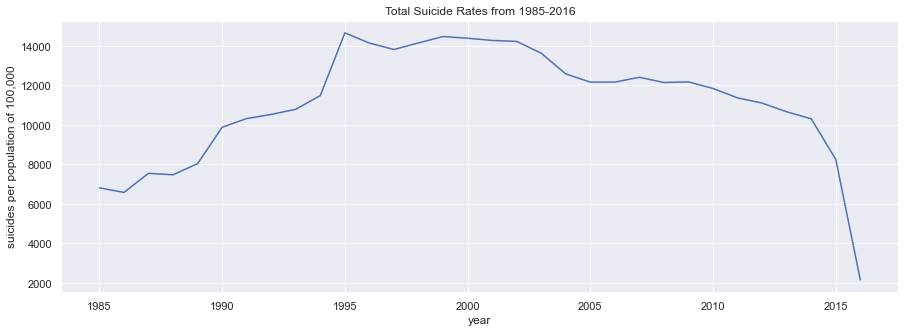

In [754]:
ax_yr = new_master_df.groupby(['year']).suicides_per_100k_pop.sum().plot(kind='line', figsize=(15,5))

ax_yr.set_title("Total Suicide Rates from 1985-2016")
ax_yr.set_ylabel("suicides per population of 100,000")

plt.show()

The rundown of values and the line plot show a rising trend of total suicide rates from 1985-1995, reaching its peak at 14660.26 suicides per population of 100000 in 1995. However the trend generally declines after said year, where the rates generally dip until the recorded year of 2016, where it reaches its lowest at 2147.39 suicides per population of 100000.

### Total Suicide Rates by Sex

Below is a rundown of the total suicide rates by sex, together with a bar graph that compares the suicide rates between males and females.

In [592]:
new_master_df.groupby(['sex']).suicides_per_100k_pop.sum()

sex
female     75014.77
male      281529.06
Name: suicides_per_100k_pop, dtype: float64

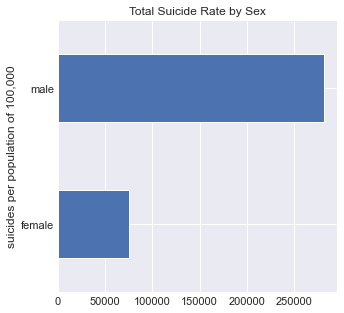

In [589]:
ax_sex = new_master_df.groupby(['sex']).suicides_per_100k_pop.sum().plot(kind='barh', figsize=(5,5))

ax_sex.set_title("Total Suicide Rate by Sex")
ax_sex.set_ylabel("suicides per population of 100,000")

plt.show()

Suicide rates among males exceed that of females by more than 3 times, with total suicides per population of 100,000 amounting to 281529.06, as compared to the smaller 75014.77 total suicides per population of 100,000 of females.

### Total Suicide Rates by Age

Below is a breakdown of the total suicide rates by age, together with a bar graph that compares the suicide rates among age groups.

In [580]:
#grouped_age = new_master_df.groupby(['age']).suicides_no.sum().reset_index()
#grouped_age.sort_values('age', ascending=True)
new_master_df.groupby(['age']).suicides_per_100k_pop.sum()

age
05-14 years      2858.39
15-24 years     41532.69
25-34 years     56571.52
35-54 years     69386.02
55-74 years     74994.20
75+ years      111201.01
Name: suicides_per_100k_pop, dtype: float64

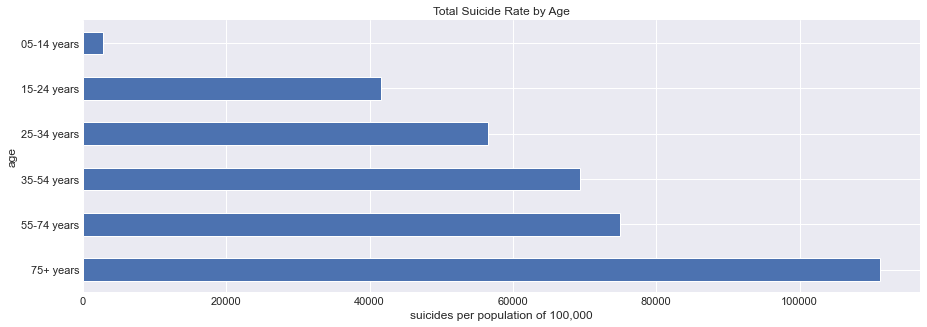

In [599]:
ax_age = new_master_df.groupby(['age']).suicides_per_100k_pop.sum().plot(kind='barh', figsize=(15,5))

ax_age.set_title("Total Suicide Rate by Age")
ax_age.set_xlabel("suicides per population of 100,000")
ax_age.invert_yaxis()

The age group of 75+ years has the highest suicide rate with 111201.01 total suicides per population of 100000, while the age group of 05-14 years has the lowest rate with 2858.39 total suicides per population of 100000. It is also worth noting that the number of suicides per population of 100000 rises as the age of each group increases.

### Total Suicide Rates by Generation

Below is a breakdown of the total suicide rates by generation, together with a bar graph that compares the suicide rates among generations.

In [590]:
new_master_df.groupby(['generation']).suicides_per_100k_pop.sum()

generation
Boomers             73563.05
G.I. Generation     65708.86
Generation X        67648.45
Generation Z          944.18
Millenials          31461.74
Silent             117217.55
Name: suicides_per_100k_pop, dtype: float64

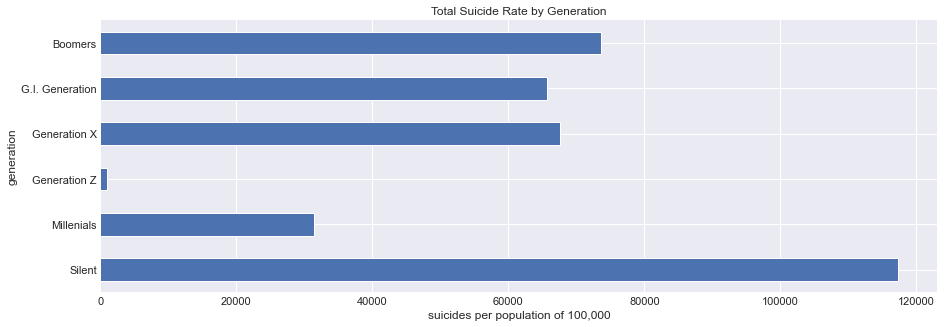

In [607]:
ax_generation = new_master_df.groupby(['generation']).suicides_per_100k_pop.sum().plot(kind='barh', figsize=(15,5))

ax_generation.set_title("Total Suicide Rate by Generation")
ax_generation.set_xlabel("suicides per population of 100,000")
ax_generation.invert_yaxis()

Among the generations recorded, the Silent generation has the highest rate with 117217.55 total suicides per population of 100000, while Generation Z has the lowest with a total of 944.18.

### Total Suicide Rates by Country

Below is an extracted rundown of the total suicide rates by country, together with a bar graph that compares the suicide rates among the countries recorded.

In [623]:
new_master_df.groupby(['country']).suicides_per_100k_pop.sum()

country
Albania                  924.76
Antigua and Barbuda      179.14
Argentina               3894.59
Armenia                  976.21
Aruba                   1596.52
                         ...   
United Arab Emirates      94.89
United Kingdom          2790.92
United States           5140.97
Uruguay                 6538.96
Uzbekistan              2138.17
Name: suicides_per_100k_pop, Length: 101, dtype: float64

In [649]:
temp = new_master_df.groupby(['country']).suicides_per_100k_pop.sum()
#new_master_df.groupby(['country']).suicides_per_100k_pop.sum()
temp.max()

11305.130000000006

In [652]:
temp.min()

0.0

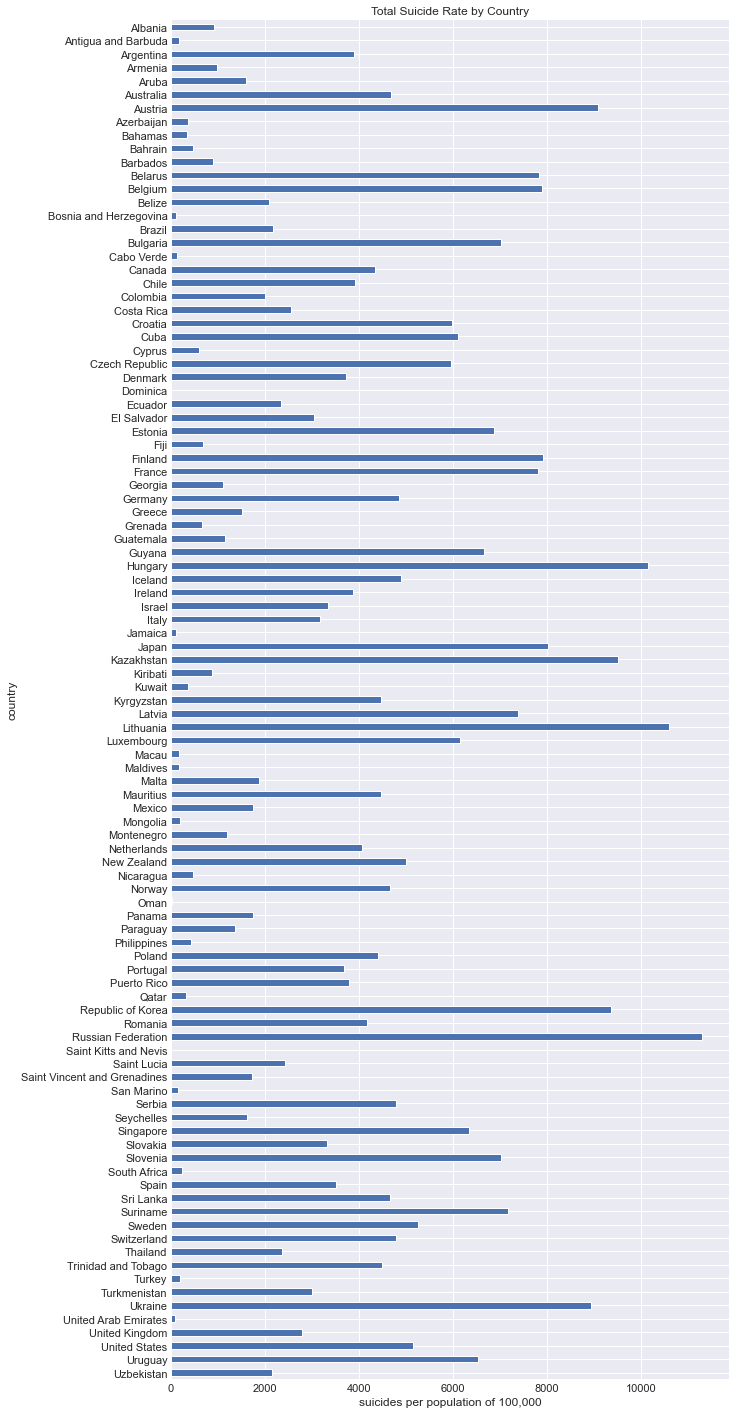

In [653]:
ax_country = new_master_df.groupby(['country']).suicides_per_100k_pop.sum().plot(kind='barh', figsize=(10,25))

ax_country.set_title("Total Suicide Rate by Country")
ax_country.set_xlabel("suicides per population of 100,000")
ax_country.invert_yaxis()

Based on the retrieved maximum value and the bar graph, the Russian Federation has the highest rate with 11305.13 suicides per populations of 100000, while the countries of Dominica and Saint Kitts and Nevis both have the lowest rate with 0.0 suicides per populations of 100000.

### Average GDP per Capita by Year

Below is a rundown of the average GDP per capita by year, together with a line graph that shows the trend of this average GDP per capita each year. This is to get an idea of the relation between suicide rates and the average global GDP per capita per year later on.

In [672]:
new_master_df.groupby(['year']).gdp_per_capita_dollars.mean()

year
1985     6091.229167
1986     7126.104167
1987     8712.592593
1988     9983.857143
1989     9725.038462
1990     9806.328125
1991    10132.937500
1992    10506.707692
1993    10553.584615
1994    11567.102941
1995    12669.346154
1996    12554.909091
1997    12336.142857
1998    12137.898734
1999    12832.192771
2000    12466.546512
2001    12005.579545
2002    12613.779070
2003    14716.186047
2004    17753.904762
2005    20155.964286
2006    21140.964706
2007    23943.430233
2008    26408.047059
2009    22607.910112
2010    23857.193182
2011    26100.918605
2012    26808.950617
2013    28032.675000
2014    27420.141026
2015    26231.193548
2016    25665.125000
Name: gdp_per_capita_dollars, dtype: float64

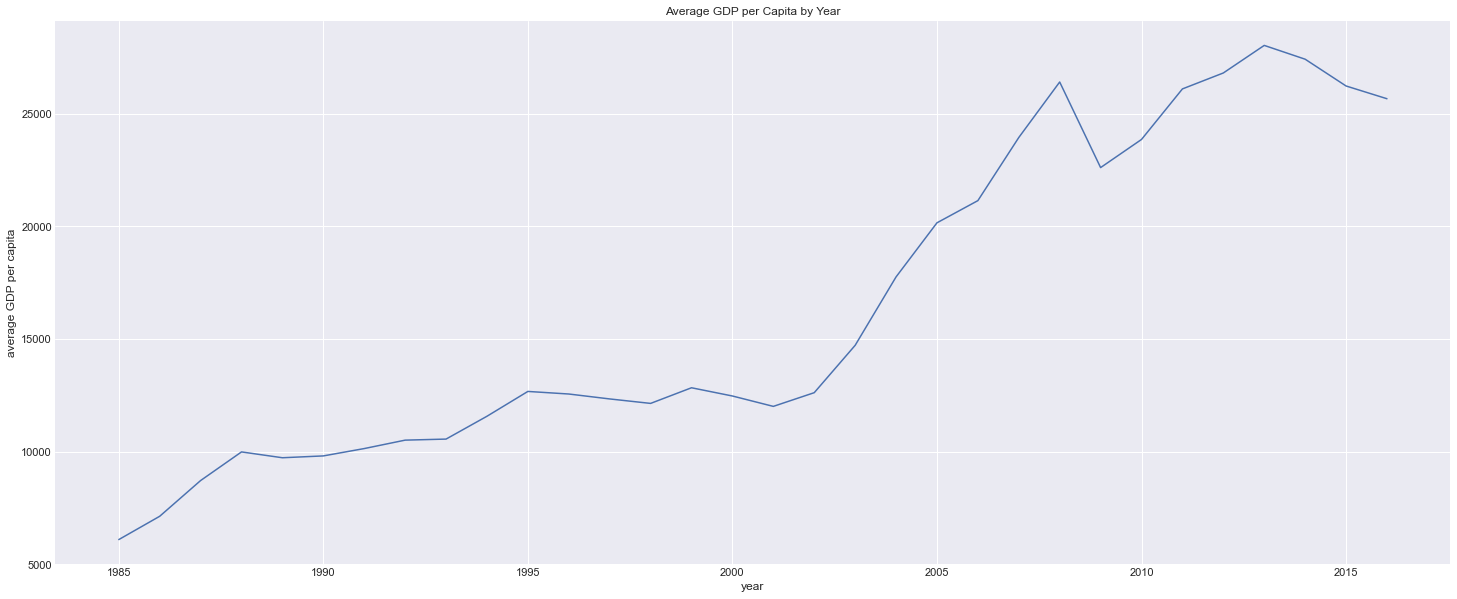

In [675]:
ax_gdp = new_master_df.groupby(['year']).gdp_per_capita_dollars.mean().plot(kind='line', figsize=(25,10))

ax_gdp.set_title("Average GDP per Capita by Year")
ax_gdp.set_ylabel("average GDP per capita")

plt.show()

Given the rundown and line graph, a trend can be seen where the average GDP per capita is on a general rising trend over time, with 1985 having the lowest average GDP per capita at 6091.229167, while the year 2013 saw its recorded peak at 28032.675.

## Data Visualization

### Suicide Rates and Overview of Demographics

To get an idea of the demographics involved in the recorded number of suicides and suicide rate, a bar graph was created as shown below.

In [680]:
sns.set_theme(style="darkgrid")

In [724]:
#temp_df = new_master_df.groupby(['age', 'sex']).suicides_per_100k_pop.sum()

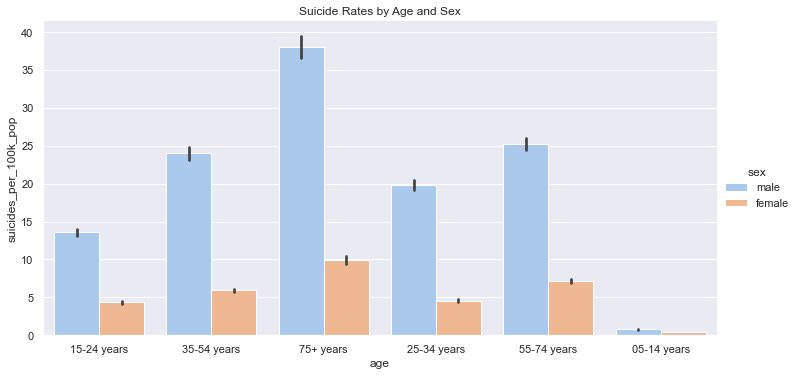

In [780]:
ax_demographic = sns.catplot(data=new_master_df, kind="bar", x="age", y="suicides_per_100k_pop", hue="sex", height=5, 
                             aspect=2, palette=sns.color_palette("pastel")).set(title="Suicide Rates by Age and Sex")



The demographics based on the graph show that people committing suicide mostly comprised of males (where number of males surpasses females by more than 3 times), with the group of people aged 75 years and above having the highest rate of suicide. This shows that suicide rates get higher with higher age groups.

### Suicide Rates and Average GDP per Capita from 1985-2016

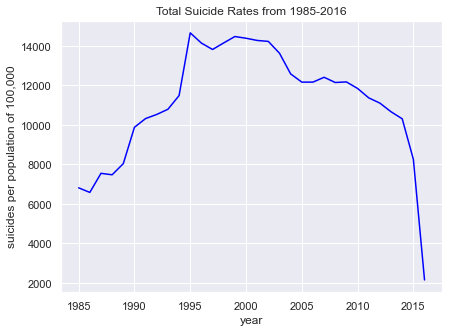

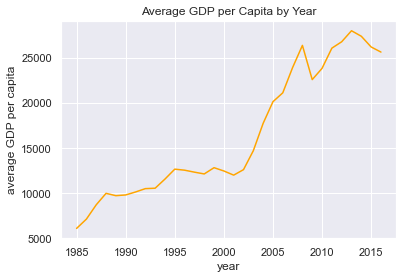

In [769]:
fig = plt.figure(figsize=(10,5))
ax_plt = fig.add_subplot(121)

ax_yr = new_master_df.groupby(['year']).suicides_per_100k_pop.sum().plot(kind='line', figsize=(15,5), color="blue")

ax_yr.set_title("Total Suicide Rates from 1985-2016")
ax_yr.set_ylabel("suicides per population of 100,000")

plt.show()

ax_plt1 = fig.add_subplot(122)

ax_gdp = new_master_df.groupby(['year']).gdp_per_capita_dollars.mean().plot(kind='line', color="orange")

ax_gdp.set_title("Average GDP per Capita by Year")
ax_gdp.set_ylabel("average GDP per capita")


plt.show()

A comparison between the trends of suicide rates and average GDP per capita from 1985-2016 can be made, where as suicide rates rise during 1985-1995, there is meanwhile a low average GDP per capita during that same period, while as the suicide rates went a decline after 1995, a rising trend can in turn be seen in that of average GDP per capita. This shows that high GDP tends to show lower rates of suicide.

### Suicide Rates, Age, and Generation

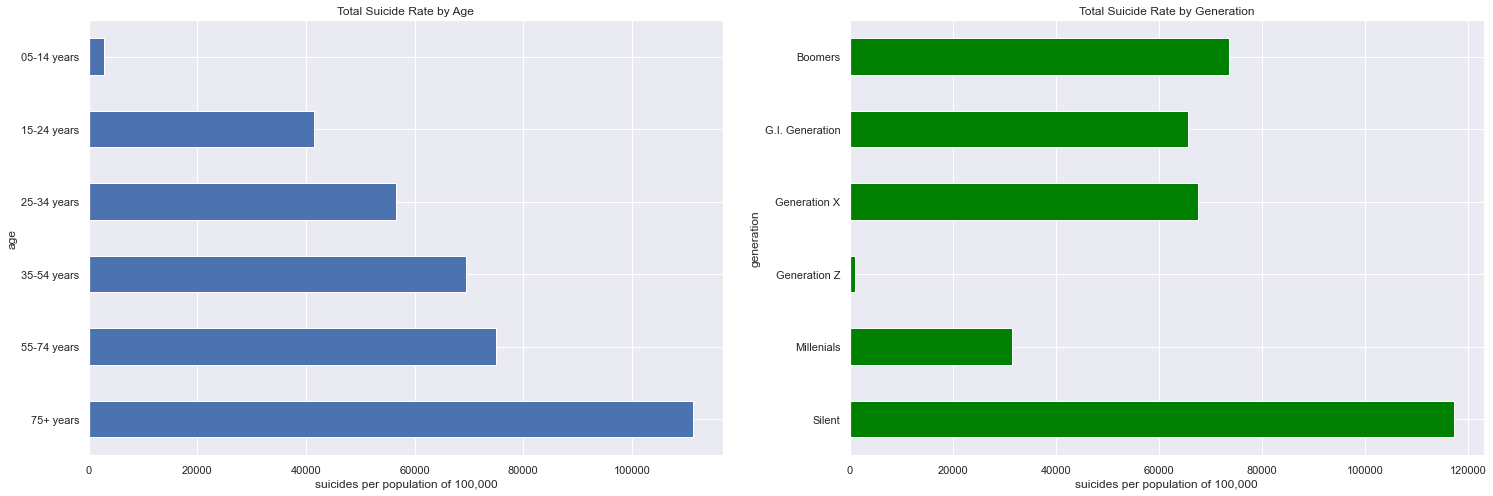

In [794]:
fig = plt.figure(figsize=(10,5))
ax_plt = fig.add_subplot(121)
ax_age = new_master_df.groupby(['age']).suicides_per_100k_pop.sum().plot(kind='barh', figsize=(25,8))

ax_age.set_title("Total Suicide Rate by Age")
ax_age.set_xlabel("suicides per population of 100,000")
ax_age.invert_yaxis()

ax_plt1 = fig.add_subplot(122)

ax_gen = new_master_df.groupby(['generation']).suicides_per_100k_pop.sum().plot(kind='barh', figsize=(25,8), color="green")

ax_gen.set_title("Total Suicide Rate by Generation")
ax_gen.set_xlabel("suicides per population of 100,000")
ax_gen.invert_yaxis()

Lastly, looking at the suicide rates by age group and by generation show a direct relationship, as the highest rates and suicides per population of 100000 can be found in both the age group of 75 years and above, as well as in the Silent generation, which are comprised of people mostly belonging to the said age group. At the same time, the lowest suicides per 100000 found in the age group of 05-14 years, which also mostly belong to Generation Z. With the rising suicide rate going alongside with older age groups, the same trend can also be observed with generations, where older generations tend to also see a higher suicide rate.